# 대구 교통사고 피해 EDA

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

In [24]:
df = pd.read_csv('daegu_traffic_accident.csv')

In [25]:
df.head(10)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3
5,ACCIDENT_00005,2019-01-01 04,화요일,맑음,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,상해없음,승용,남,35세,경상,0,0,2,0,6
6,ACCIDENT_00006,2019-01-01 05,화요일,맑음,대구광역시 수성구 지산동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,경상,승용,남,76세,경상,0,0,6,0,18
7,ACCIDENT_00007,2019-01-01 06,화요일,흐림,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,53세,경상,0,0,1,0,3
8,ACCIDENT_00008,2019-01-01 06,화요일,맑음,대구광역시 북구 태전동,기타 - 기타,건조,차대차,기타,안전운전불이행,...,상해없음,자전거,남,62세,중상,0,1,0,0,5
9,ACCIDENT_00009,2019-01-01 10,화요일,맑음,대구광역시 동구 지묘동,단일로 - 터널,건조,차대차,기타,신호위반,...,상해없음,승용,여,42세,경상,0,0,3,0,9


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [13]:
df.isnull().sum()

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

In [21]:
df[df.isna().any(axis=1)]

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
14,ACCIDENT_00014,2019-01-01 19,화요일,맑음,대구광역시 수성구 황금동,단일로 - 교량,건조,차량단독,공작물충돌,안전운전불이행,...,중상,NaN,NaN,NaN,NaN,0,1,1,0,8
53,ACCIDENT_00053,2019-01-02 23,수요일,맑음,대구광역시 북구 서변동,교차로 - 교차로부근,건조,차량단독,공작물충돌,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
100,ACCIDENT_00100,2019-01-04 12,금요일,맑음,대구광역시 동구 도학동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
118,ACCIDENT_00118,2019-01-04 20,금요일,맑음,대구광역시 남구 대명동,교차로 - 교차로부근,건조,차량단독,기타,기타,...,상해없음,NaN,NaN,NaN,NaN,0,0,1,0,3
141,ACCIDENT_00141,2019-01-05 16,토요일,맑음,대구광역시 달성군 가창면,교차로 - 교차로안,건조,차량단독,기타,안전운전불이행,...,상해없음,NaN,NaN,NaN,NaN,0,2,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39436,ACCIDENT_39436,2021-12-27 00,월요일,맑음,대구광역시 수성구 삼덕동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,부상신고,NaN,NaN,NaN,NaN,0,0,0,1,1
39437,ACCIDENT_39437,2021-12-27 05,월요일,흐림,대구광역시 달서구 이곡동,기타 - 기타,건조,차량단독,기타,기타,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
39497,ACCIDENT_39497,2021-12-28 17,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차량단독,기타,안전운전불이행,...,상해없음,NaN,NaN,NaN,NaN,0,0,1,0,3
39508,ACCIDENT_39508,2021-12-29 09,수요일,맑음,대구광역시 달서구 두류동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,부상신고,NaN,NaN,NaN,NaN,0,0,0,1,1


결측치 조회 결과 피해운전자 차종, 성별, 연령, 상해정도의 결측치가 991개로 같은 값 -> 사고유형이 [차량단독]이기 때문에 가해운전자만 있고, 피해자는 존재하지 않음
- 해당 컬럼의 결측치를 '피해자없음'이라는 정보로 대체

In [26]:
# 피해자가 없는 결측 정보 채우기

nan_col = ['피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도']

def fill_na(df=df, nan_col=nan_col):
	for col in nan_col:
		df[col].fillna('피해자없음', inplace=True)

fill_na()

/var/folders/s2/kqf29pt97w527q67cq0htzc80000gn/T/ipykernel_34876/3767903891.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('피해자없음', inplace=True)


In [28]:
df[df['사고유형']=='차량단독']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
14,ACCIDENT_00014,2019-01-01 19,화요일,맑음,대구광역시 수성구 황금동,단일로 - 교량,건조,차량단독,공작물충돌,안전운전불이행,...,중상,피해자없음,피해자없음,피해자없음,피해자없음,0,1,1,0,8
53,ACCIDENT_00053,2019-01-02 23,수요일,맑음,대구광역시 북구 서변동,교차로 - 교차로부근,건조,차량단독,공작물충돌,안전운전불이행,...,경상,피해자없음,피해자없음,피해자없음,피해자없음,0,0,1,0,3
100,ACCIDENT_00100,2019-01-04 12,금요일,맑음,대구광역시 동구 도학동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,경상,피해자없음,피해자없음,피해자없음,피해자없음,0,0,1,0,3
118,ACCIDENT_00118,2019-01-04 20,금요일,맑음,대구광역시 남구 대명동,교차로 - 교차로부근,건조,차량단독,기타,기타,...,상해없음,피해자없음,피해자없음,피해자없음,피해자없음,0,0,1,0,3
141,ACCIDENT_00141,2019-01-05 16,토요일,맑음,대구광역시 달성군 가창면,교차로 - 교차로안,건조,차량단독,기타,안전운전불이행,...,상해없음,피해자없음,피해자없음,피해자없음,피해자없음,0,2,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39436,ACCIDENT_39436,2021-12-27 00,월요일,맑음,대구광역시 수성구 삼덕동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,부상신고,피해자없음,피해자없음,피해자없음,피해자없음,0,0,0,1,1
39437,ACCIDENT_39437,2021-12-27 05,월요일,흐림,대구광역시 달서구 이곡동,기타 - 기타,건조,차량단독,기타,기타,...,경상,피해자없음,피해자없음,피해자없음,피해자없음,0,0,1,0,3
39497,ACCIDENT_39497,2021-12-28 17,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차량단독,기타,안전운전불이행,...,상해없음,피해자없음,피해자없음,피해자없음,피해자없음,0,0,1,0,3
39508,ACCIDENT_39508,2021-12-29 09,수요일,맑음,대구광역시 달서구 두류동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,부상신고,피해자없음,피해자없음,피해자없음,피해자없음,0,0,0,1,1


연도별 사고발생건수

In [48]:
df['사고일시'] = pd.to_datetime(df['사고일시'])

In [49]:
df['사고일시']

0       2019-01-01 00:00:00
1       2019-01-01 00:00:00
2       2019-01-01 01:00:00
3       2019-01-01 02:00:00
4       2019-01-01 04:00:00
                ...        
39604   2021-12-31 19:00:00
39605   2021-12-31 19:00:00
39606   2021-12-31 21:00:00
39607   2021-12-31 22:00:00
39608   2021-12-31 23:00:00
Name: 사고일시, Length: 39609, dtype: datetime64[ns]

In [72]:
df['사고일시'].dt.year.value_counts().index

Index([2019, 2020, 2021], dtype='int32', name='사고일시')

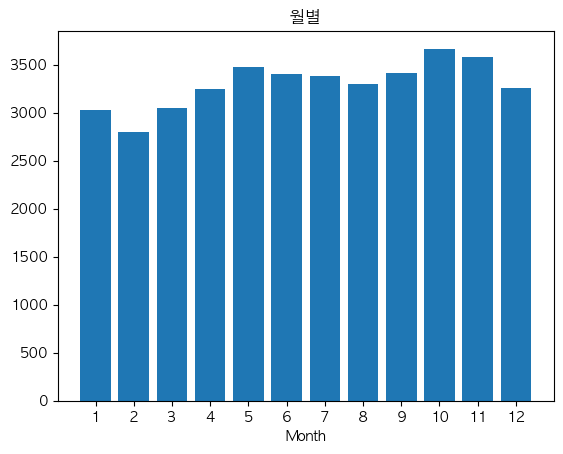

In [167]:
# 월별 사고 

plt.bar(df['사고일시'].dt.month.value_counts().index, df['사고일시'].dt.month.value_counts())
plt.xlabel('Month')
plt.xticks(np.arange(1,13))
plt.title('월별')

plt.show()


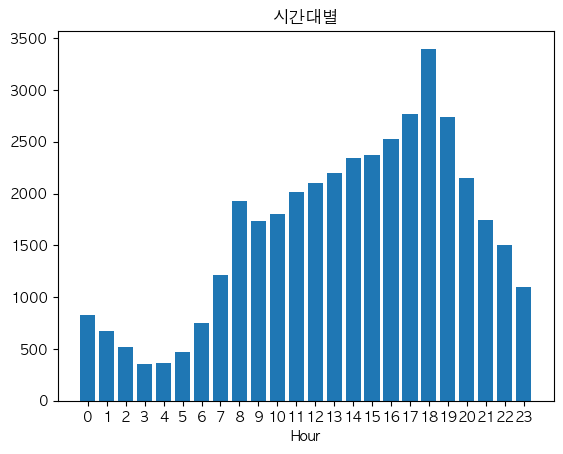

In [177]:
# 시간대별 사고 

plt.bar(df['사고일시'].dt.hour.value_counts().index, df['사고일시'].dt.hour.value_counts())
plt.plot(df['ECLO'].mean())
plt.xlabel('Hour')
plt.xticks(np.arange(0,24))
plt.title('시간대별')

plt.show()


In [ ]:
# 요일별 사고 

plt.bar(df['사고일시'].dt.hour.value_counts().index, df['사고일시'].dt.hour.value_counts())
plt.xlabel('Hour')
plt.xticks(np.arange(0,24))
plt.title('시간대별')

plt.show()


In [104]:
list(df['사고유형'].value_counts().index)

['차대차', '차대사람', '차량단독']

In [130]:
df['피해운전자 상해정도'].value_counts()

피해운전자 상해정도
경상       25034
중상        7287
상해없음      4281
부상신고      1516
피해자없음      991
기타불명       326
사망         174
Name: count, dtype: int64

In [131]:
df['가해운전자 상해정도'].value_counts()

가해운전자 상해정도
상해없음    29309
경상       4088
기타불명     2491
부상신고     2458
중상       1171
사망         92
Name: count, dtype: int64

In [ ]:
# 사고유형별 ECLO

case_df = df['사고유형']

In [147]:
df['구'] = df['시군구'].str.split().str[1]

In [165]:
df['동'] = df['시군구'].str.split().str[2]

In [166]:
df.drop(['시군구'], axis=1)

,ID,사고일시,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,구,동
0,ACCIDENT_00000,2019-01-01 00:00:00,화요일,맑음,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,...,여,70세,중상,0,1,0,0,5,중구,대신동
1,ACCIDENT_00001,2019-01-01 00:00:00,화요일,흐림,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,...,남,61세,경상,0,0,1,0,3,달서구,감삼동
2,ACCIDENT_00002,2019-01-01 01:00:00,화요일,맑음,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,...,남,38세,경상,0,0,1,0,3,수성구,두산동
3,ACCIDENT_00003,2019-01-01 02:00:00,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,남,36세,중상,0,1,0,0,5,북구,복현동
4,ACCIDENT_00004,2019-01-01 04:00:00,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,남,52세,경상,0,0,1,0,3,동구,신암동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19:00:00,금요일,맑음,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,...,남,28세,경상,0,0,1,0,3,수성구,수성동3가
39605,ACCIDENT_39605,2021-12-31 19:00:00,금요일,맑음,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,승용,...,남,52세,경상,0,0,1,0,3,달서구,상인동
39606,ACCIDENT_39606,2021-12-31 21:00:00,금요일,맑음,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,승용,...,남,73세,중상,0,2,0,0,10,달서구,월성동
39607,ACCIDENT_39607,2021-12-31 22:00:00,금요일,맑음,기타 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,여,57세,경상,0,0,1,0,3,달서구,장동


In [156]:
df['도로형태'].value_counts()

도로형태
단일로 - 기타           19485
교차로 - 교차로안          9931
교차로 - 교차로부근         5746
기타 - 기타             1986
교차로 - 교차로횡단보도내      1474
단일로 - 지하차도(도로)내      309
주차장 - 주차장            236
단일로 - 교량             232
단일로 - 고가도로위          138
단일로 - 터널              64
미분류 - 미분류              8
Name: count, dtype: int64

In [157]:
df['법규위반'].value_counts()

법규위반
안전운전불이행      21876
안전거리미확보       5277
신호위반          3786
교차로운행방법위반     2750
기타            1396
보행자보호의무위반     1154
직진우회전진행방해      980
차로위반           949
중앙선침범          881
불법유턴           427
과속             133
Name: count, dtype: int64

In [158]:
df['노면상태'].value_counts()

노면상태
건조       36420
젖음/습기     3100
기타          58
서리/결빙       25
침수           3
적설           3
Name: count, dtype: int64

In [163]:
df['ECLO'].max()

74

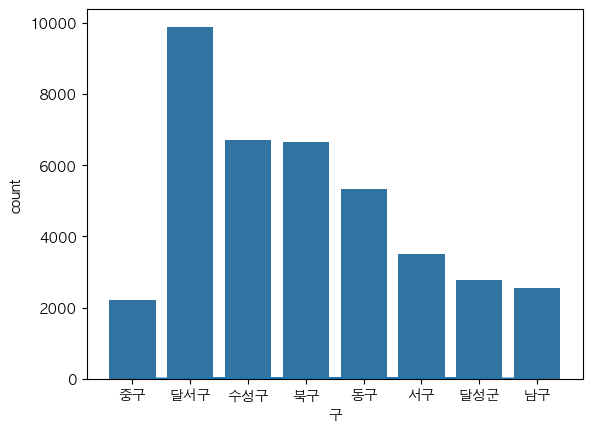

In [183]:
sns.countplot(data=df, x='구')

plt.show()

In [185]:
df.groupby(['구'])['ECLO'].mean()

구
남구     4.623681
달서구    4.618441
달성군    5.072280
동구     4.889534
북구     4.687669
서구     4.775680
수성구    4.727300
중구     4.541610
Name: ECLO, dtype: float64

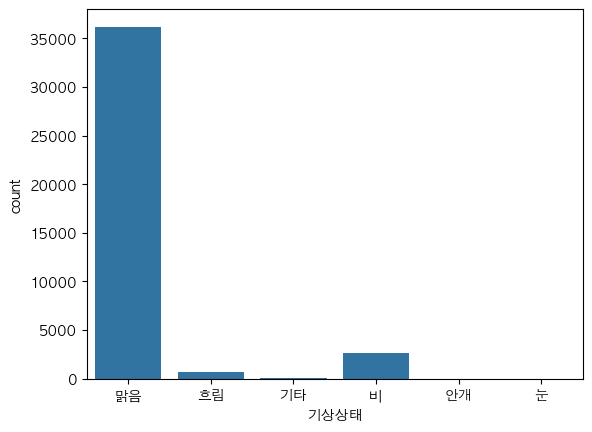

In [169]:
sns.countplot(data=df, x='기상상태')
plt.show()

In [171]:
df['법규위반'].value_counts()

법규위반
안전운전불이행      21876
안전거리미확보       5277
신호위반          3786
교차로운행방법위반     2750
기타            1396
보행자보호의무위반     1154
직진우회전진행방해      980
차로위반           949
중앙선침범          881
불법유턴           427
과속             133
Name: count, dtype: int64

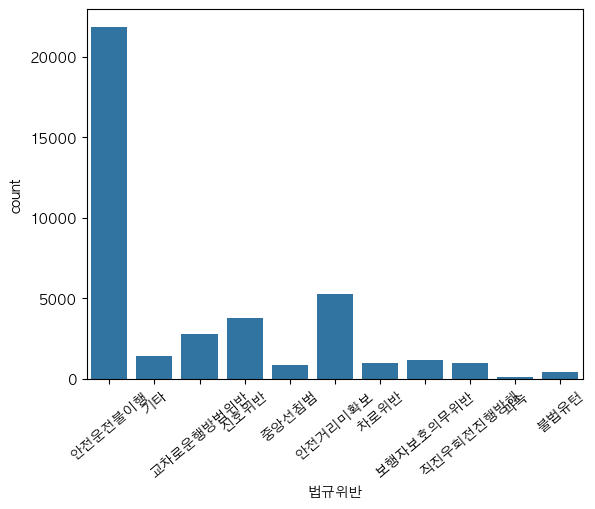

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

In [175]:
sns.countplot(data=df, x='법규위반')

plt.xticks(rotation=40)
plt.show()
plt.tight_layout

In [191]:
df.groupby(['법규위반'])['ECLO'].mean()

법규위반
과속           8.233083
교차로운행방법위반    5.019636
기타           4.131089
보행자보호의무위반    4.025130
불법유턴         4.398126
신호위반         5.427100
안전거리미확보      5.093993
안전운전불이행      4.484001
중앙선침범        5.552781
직진우회전진행방해    4.982653
차로위반         4.990516
Name: ECLO, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '안전운전불이행'),
  Text(1, 0, '안전거리미확보'),
  Text(2, 0, '신호위반'),
  Text(3, 0, '교차로운행방법위반'),
  Text(4, 0, '기타'),
  Text(5, 0, '보행자보호의무위반'),
  Text(6, 0, '직진우회전진행방해'),
  Text(7, 0, '차로위반'),
  Text(8, 0, '중앙선침범'),
  Text(9, 0, '불법유턴'),
  Text(10, 0, '과속')])

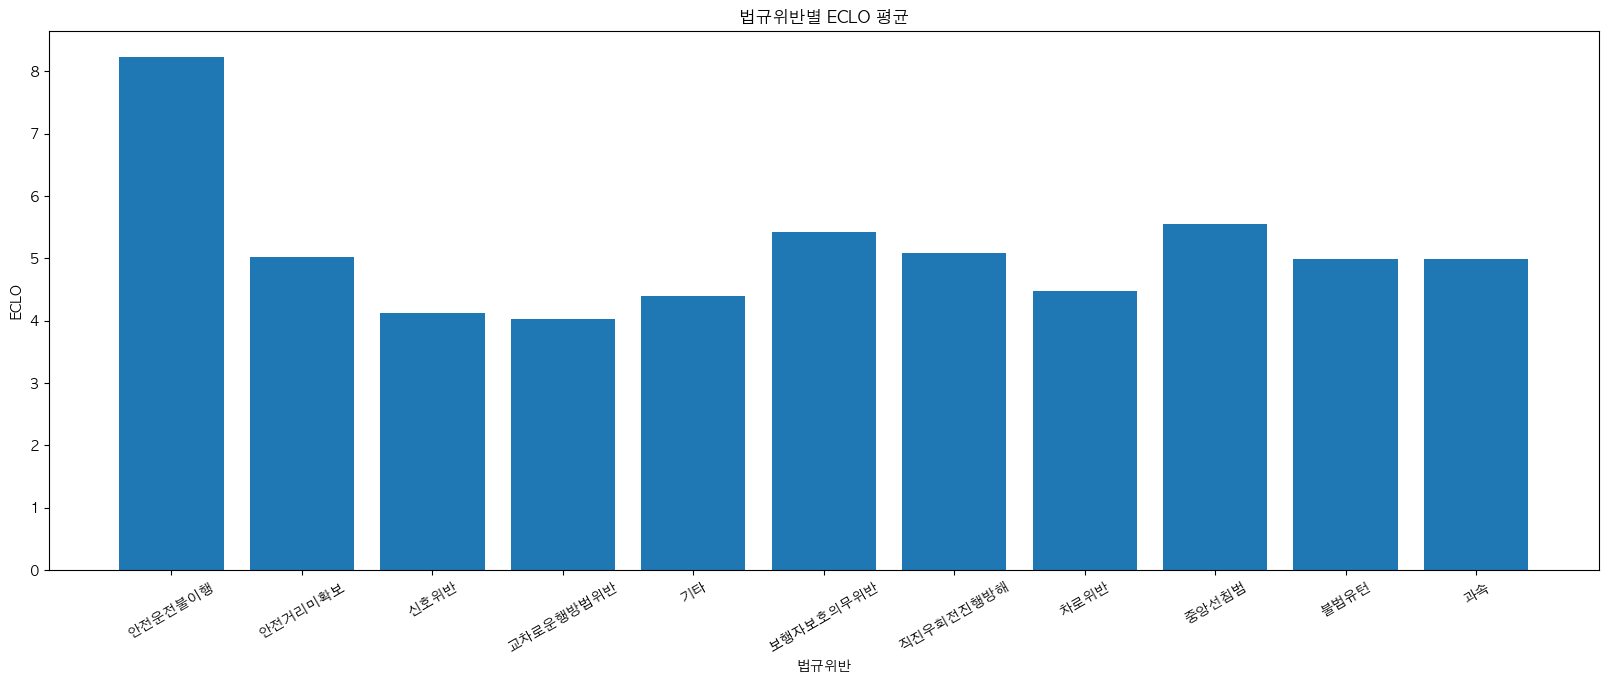

In [197]:
plt.figure(figsize=(20,7))
plt.bar(df['법규위반'].value_counts().index,df.groupby(['법규위반'])['ECLO'].mean())
plt.title('법규위반별 ECLO 평균')
plt.xlabel('법규위반')
plt.ylabel('ECLO')

plt.xticks(rotation=30)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '금요일'),
  Text(1, 0, '화요일'),
  Text(2, 0, '수요일'),
  Text(3, 0, '월요일'),
  Text(4, 0, '목요일'),
  Text(5, 0, '토요일'),
  Text(6, 0, '일요일')])

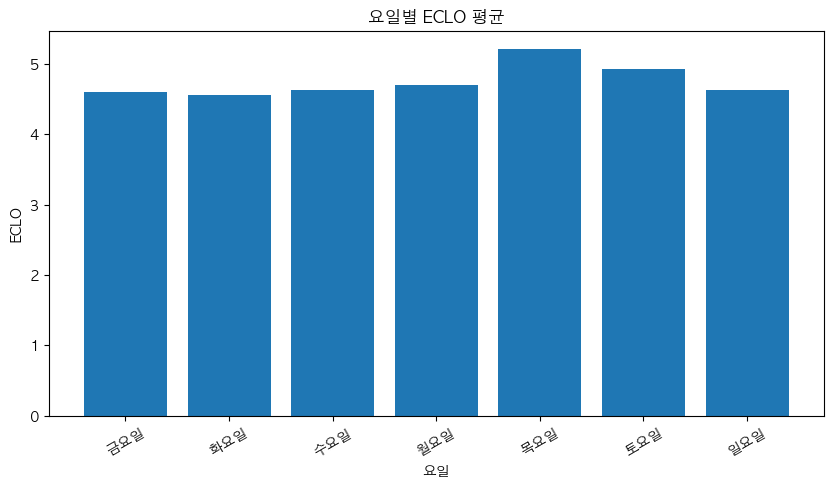

In [203]:
plt.figure(figsize=(10,5))
plt.bar(df['요일'].value_counts().index, df.groupby(['요일'])['ECLO'].mean())
plt.title('요일별 ECLO 평균')
plt.xlabel('요일')
plt.ylabel('ECLO')

plt.xticks(rotation=30)

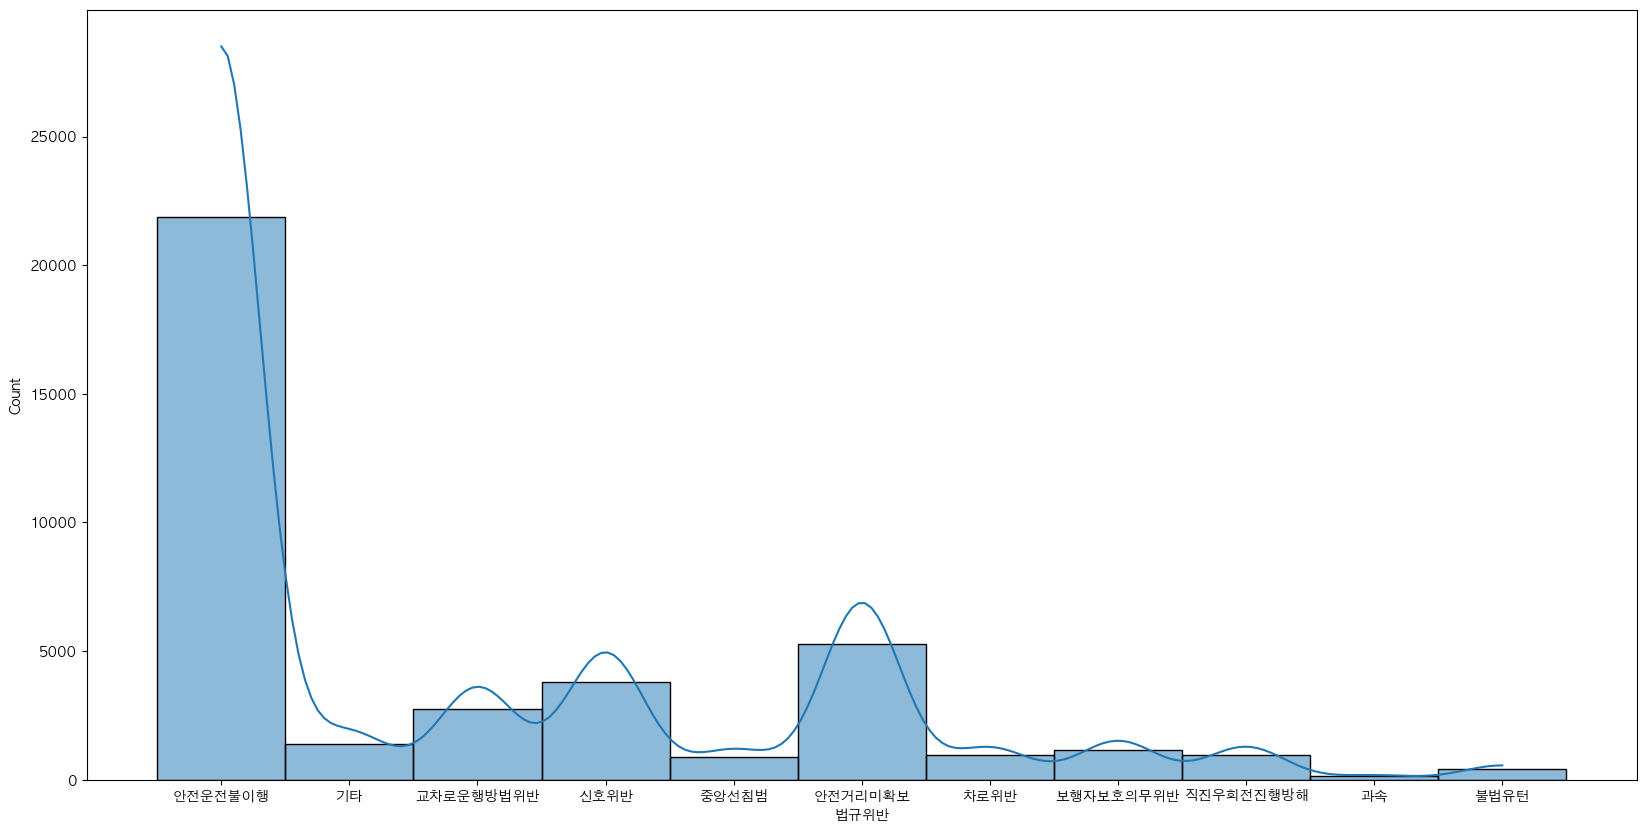

In [223]:
plt.figure(figsize=(20,10))
sns.histplot(df['법규위반'], kde=True, bins=30)
plt.show()

In [232]:
# 가해자차종, 피해자차종 ECLO 히트맵

n_df = df.groupby(['가해운전자 차종', '피해운전자 차종'])['ECLO'].mean().unstack()
n_df

피해운전자 차종,개인형이동수단(PM),건설기계,기타불명,농기계,보행자,사륜오토바이(ATV),승용,승합,원동기,이륜,자전거,특수,피해자없음,화물
가해운전자 차종,,,,,,,,,,,,,,
개인형이동수단(PM),3.666667,NaN,1.000000,NaN,3.684211,NaN,3.075758,2.333333,3.000000,4.200000,4.000000,NaN,2.875000,3.285714
건설기계,NaN,3.000000,1.000000,NaN,5.428571,NaN,5.340625,6.307692,3.666667,3.666667,5.363636,6.666667,2.333333,5.407407
기타불명,2.428571,NaN,3.000000,NaN,2.395577,1.000000,3.312500,2.875000,2.555556,2.609756,2.564516,5.000000,2.200000,4.454545
농기계,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
사륜오토바이(ATV),NaN,NaN,NaN,NaN,3.000000,5.000000,1.666667,NaN,NaN,4.500000,NaN,NaN,1.000000,3.000000
승용,3.814159,4.619718,3.425000,7.500000,3.846539,4.416667,5.578246,6.062409,3.900901,4.111418,3.761404,6.044444,4.240838,5.179720
승합,4.333333,9.166667,3.250000,NaN,3.756303,5.000000,5.308880,11.150000,4.250000,4.035398,4.241379,8.000000,4.523810,7.702128
원동기,4.666667,1.000000,1.666667,NaN,4.070423,6.000000,4.017094,3.466667,4.657143,6.000000,3.703704,3.000000,2.939394,4.285714
이륜,4.500000,3.578947,2.111111,NaN,4.238351,NaN,4.359551,4.010309,4.833333,4.763723,4.005952,3.200000,3.728814,3.497925


In [212]:
df['가해운전자 상해정도'].value_counts()

가해운전자 상해정도
상해없음    29309
경상       4088
기타불명     2491
부상신고     2458
중상       1171
사망         92
Name: count, dtype: int64

In [213]:
df['피해운전자 상해정도'].value_counts()

피해운전자 상해정도
경상       25034
중상        7287
상해없음      4281
부상신고      1516
피해자없음      991
기타불명       326
사망         174
Name: count, dtype: int64

In [227]:
df.groupby(['가해운전자 차종', '피해운전자 차종'])['ECLO'].mean()

가해운전자 차종     피해운전자 차종   
개인형이동수단(PM)  개인형이동수단(PM)    3.666667
             기타불명           1.000000
             보행자            3.684211
             승용             3.075758
             승합             2.333333
                              ...   
화물           이륜             4.185268
             자전거            3.852321
             특수             6.600000
             피해자없음          4.405405
             화물             5.558405
Name: ECLO, Length: 128, dtype: float64

In [239]:
n_df = df.groupby(['가해운전자 차종', '피해운전자 차종'])['ECLO'].mean().unstack()

In [242]:
n_df

피해운전자 차종,개인형이동수단(PM),건설기계,기타불명,농기계,보행자,사륜오토바이(ATV),승용,승합,원동기,이륜,자전거,특수,피해자없음,화물
가해운전자 차종,,,,,,,,,,,,,,
개인형이동수단(PM),3.666667,NaN,1.000000,NaN,3.684211,NaN,3.075758,2.333333,3.000000,4.200000,4.000000,NaN,2.875000,3.285714
건설기계,NaN,3.000000,1.000000,NaN,5.428571,NaN,5.340625,6.307692,3.666667,3.666667,5.363636,6.666667,2.333333,5.407407
기타불명,2.428571,NaN,3.000000,NaN,2.395577,1.000000,3.312500,2.875000,2.555556,2.609756,2.564516,5.000000,2.200000,4.454545
농기계,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
사륜오토바이(ATV),NaN,NaN,NaN,NaN,3.000000,5.000000,1.666667,NaN,NaN,4.500000,NaN,NaN,1.000000,3.000000
승용,3.814159,4.619718,3.425000,7.500000,3.846539,4.416667,5.578246,6.062409,3.900901,4.111418,3.761404,6.044444,4.240838,5.179720
승합,4.333333,9.166667,3.250000,NaN,3.756303,5.000000,5.308880,11.150000,4.250000,4.035398,4.241379,8.000000,4.523810,7.702128
원동기,4.666667,1.000000,1.666667,NaN,4.070423,6.000000,4.017094,3.466667,4.657143,6.000000,3.703704,3.000000,2.939394,4.285714
이륜,4.500000,3.578947,2.111111,NaN,4.238351,NaN,4.359551,4.010309,4.833333,4.763723,4.005952,3.200000,3.728814,3.497925


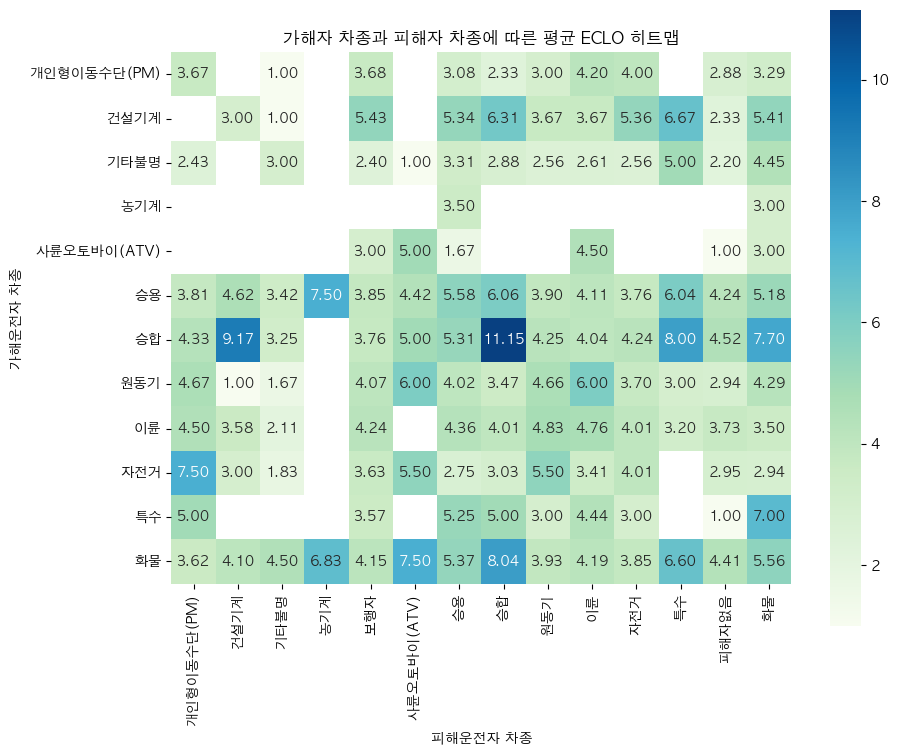

In [241]:
plt.figure(figsize=(10,8))
sns.heatmap(n_df,
			annot=True, 
			fmt='.2f', 
			cmap='GnBu',
			square = True
			)
plt.title('가해자 차종과 피해자 차종에 따른 평균 ECLO 히트맵')
plt.xlabel('피해운전자 차종')
plt.ylabel('가해운전자 차종')

plt.show()

In [ ]:
injury_dic = {'경상' : 1,
			  '중상': 2,
			  '상해없음': 0,
			  '부상신고': 1,
			  '피해자없음': 0,
			  '기타불명': 
			  '사망': 5 
			  }

In [245]:
df.loc[['피해운전자 상해정도']=='기타불명']

KeyError: 'False: boolean label can not be used without a boolean index'